In [436]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [437]:
data=pd.read_csv('https://github.com/ybifoundation/Dataset/raw/main/Salary%20Data.csv')
data.head()

,Experience Years,Salary
0,1.1,39343
1,1.2,42774
2,1.3,46205
3,1.5,37731
4,2.0,43525


In [438]:
# Let's convert salary  into ten thousands pa
data['Salary']=data['Salary']/10000
data.head()

,Experience Years,Salary
0,1.1,3.9343
1,1.2,4.2774
2,1.3,4.6205
3,1.5,3.7731
4,2.0,4.3525


In [439]:
X= data.iloc[:,0:1]
y= data.iloc[:,-1]

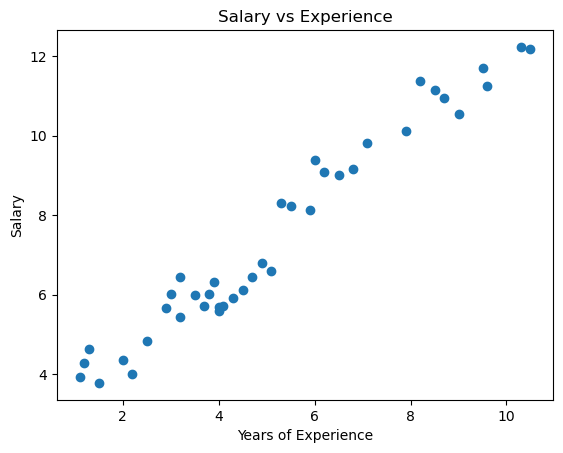

In [440]:
plt.scatter(X,y)
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs Experience')
plt.show()

In [441]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [442]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [443]:
X_test

,Experience Years
22,5.1
20,4.7
25,5.9
4,2.0
10,3.2
15,4.0
28,6.5
11,3.5


In [444]:
y_test

22    6.6029
20    6.4500
25    8.1363
4     4.3525
10    6.4445
15    5.5794
28    9.0000
11    6.0000
Name: Salary, dtype: float64

In [445]:
lr.predict(X_test.iloc[0].values.reshape(1,1))

c:\Users\bhavy\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([7.46253138])

In [446]:
lr.predict(X_test)

array([7.46253138, 7.0821366 , 8.22332096, 4.51447179, 5.65565615,
       6.41644572, 8.79391313, 5.94095224])

In [447]:
lr.coef_

array([0.95098696])

In [448]:
lr.intercept_

2.6124978629253555

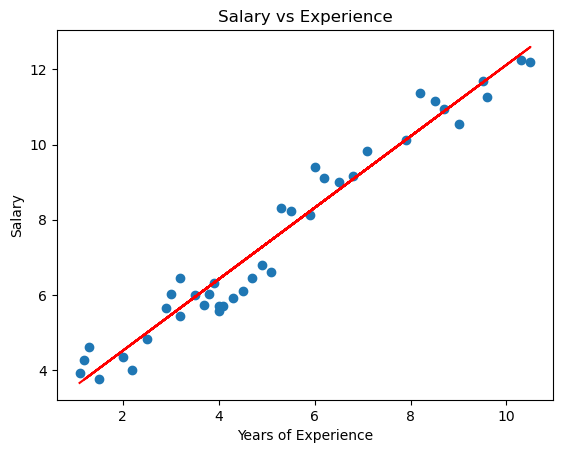

In [449]:
plt.scatter(X,y)
plt.plot(X_train,lr.predict(X_train), color='red')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs Experience')
plt.show()

### Regression Metrics (MAE, MSE, RMSE | R2 score, Adjusted R2 score)

In [450]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred=lr.predict(X_test)
X_test.shape

(8, 1)

In [451]:
print('MAE:', mean_squared_error(y_test,y_pred))
print('MSE:', mean_absolute_error(y_test,y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2 Score:', r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)
adjusted_r2_Score = 1- (((1-r2)*(8-1))/(8-1-1))
print('Adjusted R2 Score:', adjusted_r2_Score)

MAE: 0.31765611212300005
MSE: 0.4539731159097141
RMSE: 0.5636098935638019
R2 Score: 0.826095738296515
Adjusted R2 Score: 0.7971116946792675


In [452]:
# Let's add a random column to the dataset
data['Random'] = np.random.randint(200,1000, len(data))
data.head()

,Experience Years,Salary,Random
0,1.1,3.9343,950
1,1.2,4.2774,463
2,1.3,4.6205,589
3,1.5,3.7731,941
4,2.0,4.3525,302


In [453]:
# Let's split the data into X and y
X2 = data.drop('Salary', axis=1)
y2 = data['Salary']

In [454]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=0)

In [455]:
lr.fit(X_train2, y_train2)
y_pred2 = lr.predict(X_test2)
X_test2.shape

(8, 2)

In [456]:
## Let's find values now!
print('MAE:', mean_squared_error(y_test2,y_pred2))
print('MSE:', mean_absolute_error(y_test2,y_pred2))
print('RMSE:', np.sqrt(mean_squared_error(y_test2,y_pred2)))
print('R2 Score:', r2_score(y_test2,y_pred2))
r2_score2 = r2_score(y_test2,y_pred2)
adjusted_r2_Score2 = 1- (((1-r2_score2)*(8-1))/(8-1-1))
print('Adjusted R2 Score:', adjusted_r2_Score2)

MAE: 0.33568419456376486
MSE: 0.49382987170742
RMSE: 0.5793825977398397
R2 Score: 0.8162260702903259
Adjusted R2 Score: 0.7855970820053803


In [457]:
# Let's add a relevant column to the dataset
data['iq'] = data['Experience Years']*70 + np.random.randint(5,20, len(data))
data.drop('Random', axis=1, inplace=True)
data.head()

,Experience Years,Salary,iq
0,1.1,3.9343,88.0
1,1.2,4.2774,89.0
2,1.3,4.6205,96.0
3,1.5,3.7731,120.0
4,2.0,4.3525,150.0


In [458]:
# Let's split the data into X and y
X3 = data.drop('Salary', axis=1)
y3 = data['Salary']

In [459]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=0)

In [460]:
lr.fit(X_train3, y_train3)
y_pred3=lr.predict(X_test3)

In [461]:
X_test3.shape

(8, 2)

In [462]:
## Let's find values now!
print('MAE:', mean_squared_error(y_test3,y_pred3))
print('MSE:', mean_absolute_error(y_test3,y_pred3))
print('RMSE:', np.sqrt(mean_squared_error(y_test3,y_pred3)))
print('R2 Score:', r2_score(y_test3,y_pred3))
r2_score3 = r2_score(y_test3,y_pred3)
adjusted_r2_Score3 = 1- (((1-r2_score3)*(8-1))/(8-1-1))
print('Adjusted R2 Score:', adjusted_r2_Score3)

MAE: 0.28316007714551955
MSE: 0.4353985924382713
RMSE: 0.5321278766852189
R2 Score: 0.8449809643806693
Adjusted R2 Score: 0.8191444584441142


In [463]:
# Notice variations in R2 Score and Adjusted R2 Score in case of Random (irrelevant) and IQ (relevant) columns
# This is why it is important to remove irrelevant columns from the dataset before training the model, this is also known as Feature Selection
# Difference between R2 Score and Adjusted R2 Score is that Adjusted R2 Score penalizes the model for adding irrelevant features
# Adjusted R2 Score is always less than R2 Score